In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.DataFrame({
    'k1':['one']*3+['two']*4,
    'k2':[1,1,2,3,3,4,4]
})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [3]:
data.duplicated() #각 행이 중복인지 아닌지를 출력

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates() #중복 제거

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [5]:
data['v1']=range(7)
data

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


In [6]:
data.drop_duplicates('k1')

,k1,k2,v1
0,one,1,0
3,two,3,3


In [7]:
data.drop_duplicates(['k1','k2'], keep='last')

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


In [8]:
data=pd.DataFrame({
    'food':['bacon', 'pork', 'bacon',
           'beef', 'Bacon', 'ham'],
    'ounces':[4,3,12,6,8,3]    
})
data

,food,ounces
0,bacon,4
1,pork,3
2,bacon,12
3,beef,6
4,Bacon,8
5,ham,3


In [9]:
meat_to_ani={
    'bacon':'pig',
    'pork':'pig',
    'beef':'cow',
    'ham':'pig'
}
#data['animal']=#구현

In [10]:
#data의 food컬럼값에 대해 소문자 -> 대문자 변환
lowercased=data.food.str.lower()
lowercased
#meat_to_ani를 참조하여 lowercased에 저장된 값에 대한 대응되는 값을 출력하시오


0    bacon
1     pork
2    bacon
3     beef
4    bacon
5      ham
Name: food, dtype: object

In [11]:
data['animal']=lowercased.map(meat_to_ani) #시리즈.map(딕셔너리) => 시리즈 타입으로 저장된
#데이터가 딕셔너리의 키가 되며, 키에 해당되는 값이 리턴(시리즈)
data

,food,ounces,animal
0,bacon,4,pig
1,pork,3,pig
2,bacon,12,pig
3,beef,6,cow
4,Bacon,8,pig
5,ham,3,pig


In [12]:
data=pd.DataFrame({
    'food':['bacon', 'pork', 'bacon',
           'beef', 'Bacon', 'ham'],
    'ounces':[4,3,12,6,8,3]    
})
data
data['food'].map(lambda x: meat_to_ani[x.lower()] ) # pig, pig, pig, cow, pig, pig 출력

0    pig
1    pig
2    pig
3    cow
4    pig
5    pig
Name: food, dtype: object

In [13]:
data=pd.Series([1, -900, 2, -999, -1000, 3])
data

0       1
1    -900
2       2
3    -999
4   -1000
5       3
dtype: int64

In [14]:
data.replace(-900, np.nan)
data.replace([-900,-999], np.nan)
data.replace([-900,-999], [np.nan,0])
data.replace({-900 : np.nan,
              -999 : 0})

0       1.0
1       NaN
2       2.0
3       0.0
4   -1000.0
5       3.0
dtype: float64

In [15]:
data=pd.DataFrame(np.arange(12).reshape(3,4),
            index=['Seoul','Busan','Daejon'],
            columns=['one','two','three','four'])
data

,one,two,three,four
Seoul,0,1,2,3
Busan,4,5,6,7
Daejon,8,9,10,11


In [16]:
tf=lambda x: x[:6].upper()
data.index=data.index.map(tf)
data

,one,two,three,four
SEOUL,0,1,2,3
BUSAN,4,5,6,7
DAEJON,8,9,10,11


In [17]:
data.rename(index=str.title, columns=str.upper, inplace=True)
data

,ONE,TWO,THREE,FOUR
Seoul,0,1,2,3
Busan,4,5,6,7
Daejon,8,9,10,11


In [18]:
ages=[20,22,25,27,31,21,23,37,61,45,41,32]
bins=[18,25,35,60,100]
cats=pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (25, 35], ..., (35, 60], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [19]:
cats.codes

array([0, 0, 0, 1, 1, 0, 0, 2, 3, 2, 2, 1], dtype=int8)

In [20]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [21]:
type(pd.value_counts(cats))
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [22]:
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [25, 35), ..., [35, 60), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [23]:
pd.cut(ages, bins, labels=['youth', 'young', 'middleAged', 'senior'])
#나이가 저장된 리스트
#연령대로 구분 -> 'youth', 'young', 'middleAged', 'senior'

['youth', 'youth', 'youth', 'young', 'young', ..., 'middleAged', 'senior', 'middleAged', 'middleAged', 'young']
Length: 12
Categories (4, object): ['youth' < 'young' < 'middleAged' < 'senior']

In [24]:
data=pd.DataFrame(np.random.randn(1000,4))

In [25]:
data.describe()
#특이값(극단값, outliers) > 3(절대값)

col=data[0]
col
#col의 절대값이 3보다 큰 데이터를 모두 출력
np.abs(-5)
np.abs(5)

5

In [26]:
col[np.abs(col)>3]

50     3.118324
146    3.191346
355    3.193252
476    3.168025
493   -3.523446
Name: 0, dtype: float64

In [27]:
#절대값 3을 초과하는 값이 들어있는 모든 행을 선택 출력
#data.head()
data[(np.abs(data)>3).any(1)] #any함수: 어느 하나라도 해당되면 -> 전체를 추출

,0,1,2,3
50,3.118324,1.255966,-0.637274,0.354321
146,3.191346,0.383876,-0.127721,1.981360
187,-0.374475,-1.772510,-3.276596,1.629633
259,0.277920,0.511859,0.306142,-3.426513
355,3.193252,-0.126022,-0.327539,0.773549
417,0.428538,-0.419404,-3.154224,1.906375
476,3.168025,0.626904,1.681163,0.156700
493,-3.523446,1.168169,-0.854885,-0.608339
547,0.923413,-0.057016,3.075183,-0.612196
558,0.023156,0.199535,-3.713804,0.728674


In [28]:
all([1,2,3]) #0:거짓, 0이 아니면:참
all([1,2,3,0])

False

In [29]:
any([1,2,0])

True

In [30]:
np.sign(2) #음수:-1, 0:0, 양수:1

1

In [31]:
# data에 저장된 값중 절대값이 3보다 큰 데이터는 3또는 -3으로 변경하시오.
# -4.1 => -3, -3.1 => -3
# 3.2 => 3, 4.9 => 3

data[np.abs(data)>3]=np.sign(data)*3

In [32]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.028146,0.041172,0.026508,-0.046503
std,1.019443,0.931739,1.025534,0.987700
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.684439,-0.552155,-0.653439,-0.672884
50%,0.001292,0.043596,0.000940,-0.079133
75%,0.689951,0.697521,0.718622,0.634147
max,3.000000,2.889583,3.000000,3.000000


In [33]:
df=pd.DataFrame(np.arange(5*4).reshape(5,4))
sampler=np.random.permutation(5)
sampler

array([3, 4, 1, 2, 0])

In [34]:
df.take(sampler)

,0,1,2,3
3,12,13,14,15
4,16,17,18,19
1,4,5,6,7
2,8,9,10,11
0,0,1,2,3


In [35]:
df.sample(n=3) #랜덤하게 3개씩 추출

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
4,16,17,18,19


In [36]:
ch=pd.Series([5,6,-1,4,3])
ch.sample(n=3)

4    3
0    5
1    6
dtype: int64

In [37]:
np.random.seed(921)

In [38]:
x=np.random.rand(5)

In [39]:
x

array([0.9656181 , 0.29582799, 0.03620148, 0.59954018, 0.72301574])

In [40]:
np.random.shuffle(x)

In [41]:
x

array([0.59954018, 0.29582799, 0.03620148, 0.72301574, 0.9656181 ])

In [42]:
x=np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
np.random.shuffle(x)

In [44]:
x #shuffle(x) : x배열 자체가 변경됨

array([6, 3, 4, 8, 5, 7, 2, 1, 0, 9])

In [45]:
x=np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
np.random.permutation(x)

array([3, 9, 6, 4, 1, 2, 5, 8, 7, 0])

In [47]:
x #permutation(x) : x배열은 변경 안됨

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
#np.random.choice(배열(정수), size, replace, 확률)
np.random.choice(5, 5, replace=False) #5:0~4까지 배열, 3: 3개 추출,replace=True(디폴트, 복원)


array([0, 4, 2, 3, 1])

In [49]:
np.random.choice(5, 3, replace=True, p=[0.1, 0, 0.3, 0.6, 0]) #0, 2, 3 만 추출 가능

array([3, 3, 2], dtype=int64)

In [50]:
# train.csv -> modeling -> model -> test.csv -> result -> submission.csv -> score
#                 필요 자전거 대수 예측 모델               예측:10 대          정답:5대

In [51]:
train=pd.read_csv("train.csv", parse_dates=["datetime"])
train.shape
#소스코드가 저장된 경로상에 data 폴더 생성하고, 폴더에 데이터파일 저장
#pd.read_csv("data/train.csv")
train.info()
train.columns
train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [52]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [53]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [54]:
#train 각 컬럼별 결측값의 개수
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [55]:
#pip install missingno 설치
import missingno as msno
msno.matrix(train, figsize=(12,5))

C:\Users\CJ\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<AxesSubplot:>

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [57]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train.shape
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:title={'center':'시간별 대여량'}, xlabel='hour', ylabel='count'>

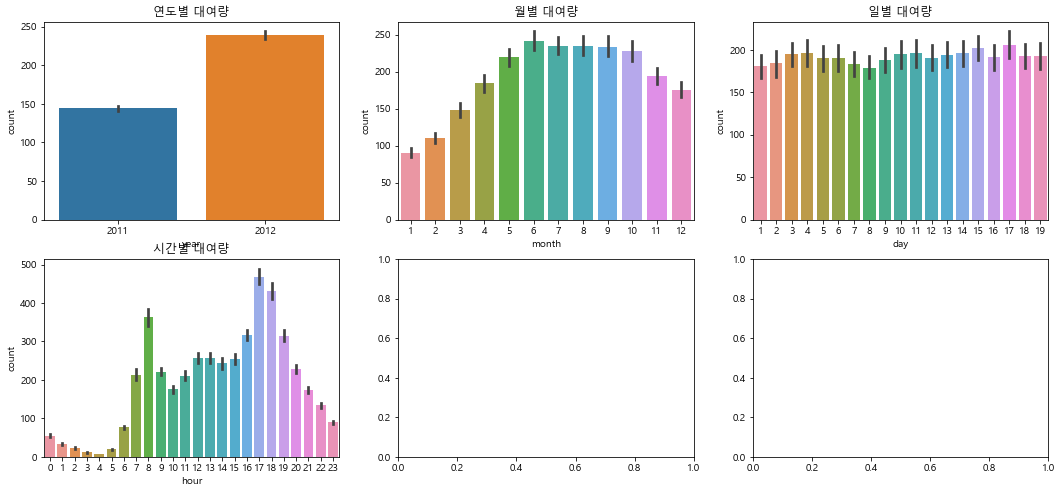

In [60]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)
ax1.set(ylabel='Count', title='연도별 대여량')
ax2.set(ylabel='count',xlabel='month', title='월별 대여량')
ax3.set(ylabel='Count',xlabel='day', title='일별 대여량')
ax4.set(ylabel='Count',xlabel='hour', title='시간별 대여량')
#카페 -> 검색어:한글, 2247번 글

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)

<AxesSubplot:title={'center':'근무일별 대여량'}, xlabel='workingday', ylabel='count'>

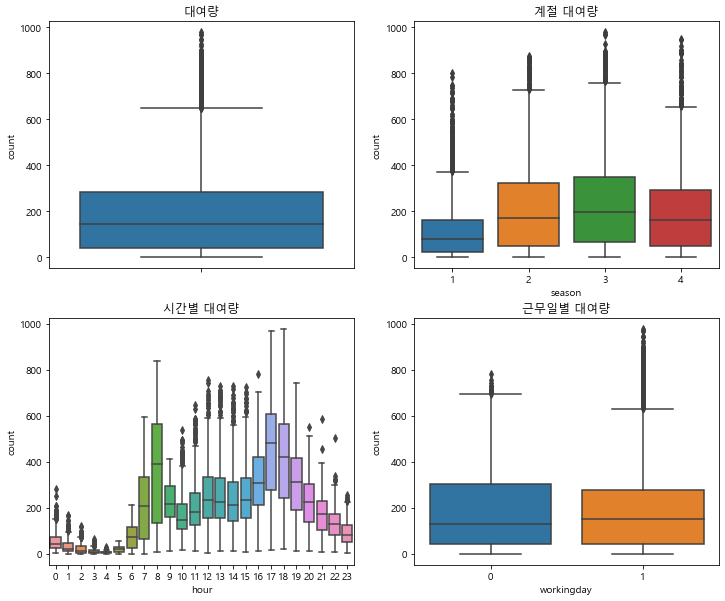

In [61]:
figure, ((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(12,10)
ax1.set(ylabel='Count', title='대여량')
ax2.set(ylabel='count',xlabel='Season', title='계절 대여량')
ax3.set(ylabel='Count',xlabel='hour of the day', title='시간별 대여량')
ax4.set(ylabel='Count',xlabel='working day', title='근무일별 대여량')
#카페 -> 검색어:한글, 2247번 글

sns.boxplot(data=train, y='count',orient='v', ax=ax1)
sns.boxplot(data=train, x='season', y='count', ax=ax2)
sns.boxplot(data=train, x='hour', y='count', ax=ax3)
sns.boxplot(data=train, x='workingday', y='count', ax=ax4)

In [62]:
train['dayofweek']=train['datetime'].dt.dayofweek
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

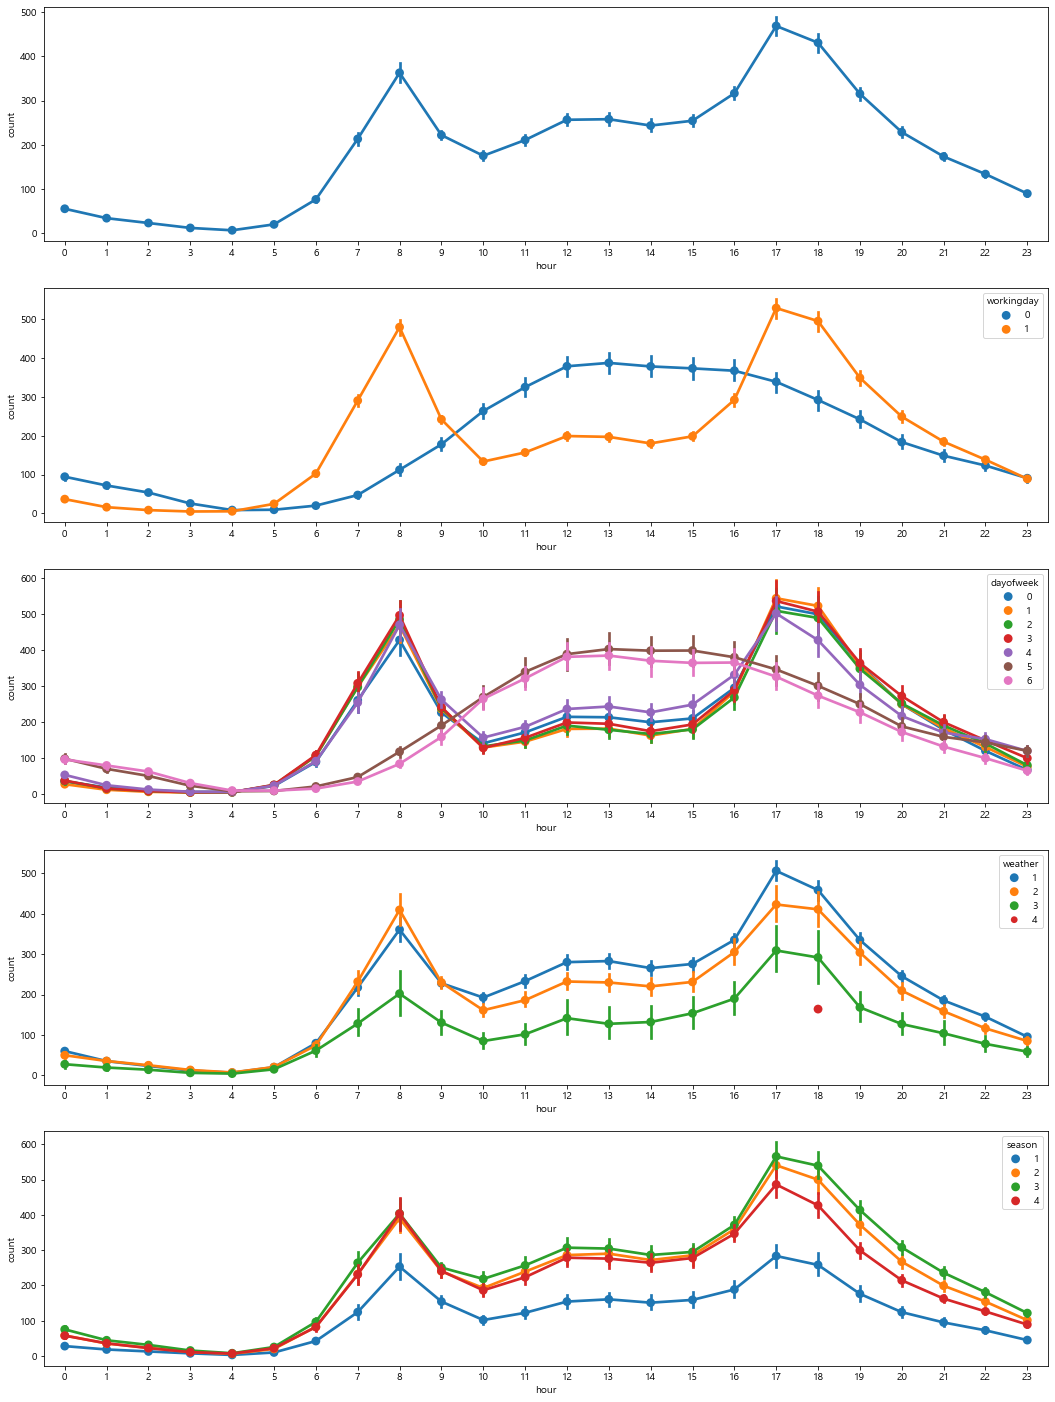

In [63]:
fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)
sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count',hue='workingday', ax=ax2)
sns.pointplot(data=train, x='hour', y='count',hue='dayofweek', ax=ax3)
sns.pointplot(data=train, x='hour', y='count',hue='weather', ax=ax4)
sns.pointplot(data=train, x='hour', y='count',hue='season', ax=ax5)

In [64]:
train.columns
corrMatt=train[['temp','season', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
corrMatt=corrMatt.corr()

mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False

<AxesSubplot:>

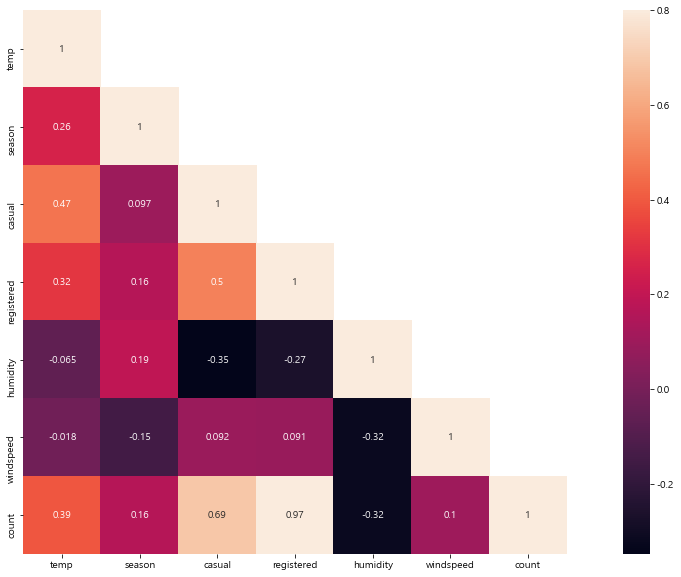

In [65]:
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, square=True, annot=True, vmax=0.8, mask=mask)

<AxesSubplot:xlabel='temp', ylabel='count'>

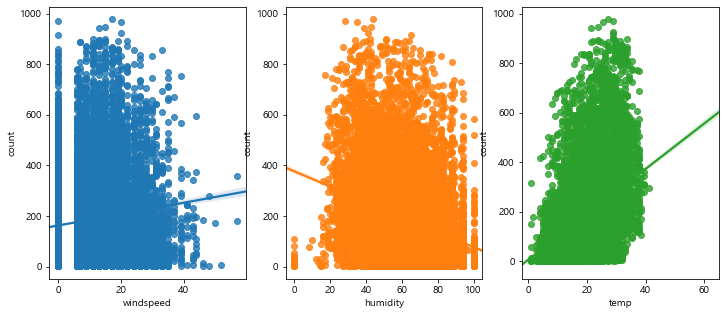

In [66]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3) #nrows=3
fig.set_size_inches(12,5)
sns.regplot(x='windspeed', y='count', data=train, ax=ax1)
sns.regplot(x='humidity', y='count', data=train, ax=ax2)
sns.regplot(x='temp', y='count', data=train, ax=ax3)

In [67]:
#windspeed가 0인 데이터의 건수 출력
#len(train[train.windspeed==0])
#train[train.windspeed==0].count()
(train.windspeed==0).sum()

1313

In [68]:
train.windspeed.value_counts().loc[0]

1313

In [69]:
#train['datetime'] # 2011-01-01 00:00:00  =>  2011-1

In [70]:
def cym(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)
#{0}, {1}은 각각 format함수의 인수의 위치
    
train['ym']=train['datetime'].apply(cym)
train[['datetime','ym']]

,datetime,ym
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1
...,...,...
10881,2012-12-19 19:00:00,2012-12
10882,2012-12-19 20:00:00,2012-12
10883,2012-12-19 21:00:00,2012-12
10884,2012-12-19 22:00:00,2012-12


<AxesSubplot:xlabel='ym', ylabel='count'>

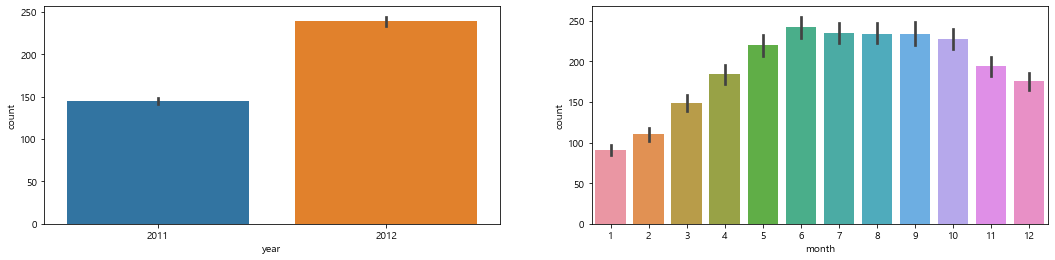

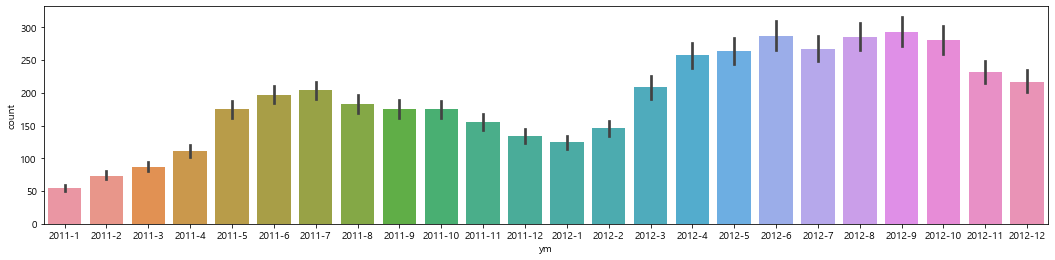

In [71]:
fig, (ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(18,4)
sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)


fig, (ax3)=plt.subplots()
fig.set_size_inches(18,4)
sns.barplot(data=train, x='ym', y='count', ax=ax3)

In [72]:
a = 3*train["count"].std() #count의 표준편차(181)의 3배
b= np.abs(train['count']-train['count'].mean()) #각각 count - count의 평균(191) 의 절대값

#극단값 정의 : 표준편차의 3배가 넘는 값
trainWithoutOutliers = b<=a # 이 범위에 속하는 것은 정상데이터


print(trainWithoutOutliers.shape)
print(train.shape)
# => 약 150건의 데이터를 아웃라이어로 간주

(10886,)
(10886, 20)


In [73]:
x=np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
np.random.permutation(x) #x가 랜덤하게 뒤섞여서 출력

array([8, 7, 6, 2, 5, 9, 1, 0, 4, 3])